<a href="https://colab.research.google.com/github/amjadraza/learn-ml-with-spark/blob/main/Getting_Started_with_PySpark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Overview


*   Understand the integration of PySpark in Google Colab
*   We’ll also look at how to perform Data Exploration with PySpark in Google Colab


#Introduction
Google Colab is a life savior for data scientists when it comes to working with huge datasets and running complex models.

While for data engineers, PySpark is, simply put, a demigod!

So what happens when we take these two, each the finest player in their respective category, and combine them together?

We get the perfect solution (almost) for all your data science and machine learning problems!

Data engineers / Scientist face the issues of development environments on daily basis. Specifically, when they have to try a quick tutorial which requires a specific environment. Google colab helps data professionals quickly reproduce the results by using free notebook environemnet. In the previous tutorial/section, we have have learned about Google Colab. In this tutorial, below are our learning objectives.

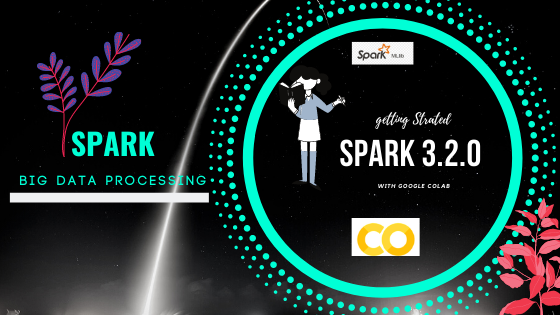


In this article, we will see how we can run PySpark in a Google Colaboratory notebook. We will also perform some basic data exploratory tasks common to most data science problems. So, let’s get cracking!

#Table of Contents


*   Connecting Google Drive to Colab
*   Reading data from Google Drive
*  Setting up PySpark in Google Colab
* Load data into PySpark
* Understanding the Data
* Data Exploration with PySpark Dataframes
          *   Show column details
          *   Display rows
          *   Number of rows in dataframe
          *   Display specific columns
          *   Describing the columns
          *   Distinct values for Categorical columns
          *   Aggregate with Groupby
          *   Counting and Removing Null values
          *   Save to file









 





#Connecting Drive to Colab
The first thing you want to do when you are working on Colab is mounting your Google Drive. This will enable you to access any directory on your Drive inside the Colab notebook.



The First step is to download the train data set which you can find [here](https://www.kaggle.com/sdolezel/black-friday/version/1?select=train.csv).

Once you have done that, the next obvious step is to load the data.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Reading Data from Drive
Now, I am assuming that you will be working with a large enough dataset. Therefore, the best way to upload data to Drive is in a zip format. Just drag and drop your zip folder inside any directory you want on Drive.

Unzipping this data is not a hassle at all. You just have to provide the path to the zip folder along with the !unzip command.

In [ ]:
!unzip "/content/drive/MyDrive/black_friday_train.zip"

Archive:  /content/drive/MyDrive/black_friday_train.zip
  inflating: train.csv               


If you aren’t really sure what is the exact location of the folder, you can check it out from the side panel on Colab.

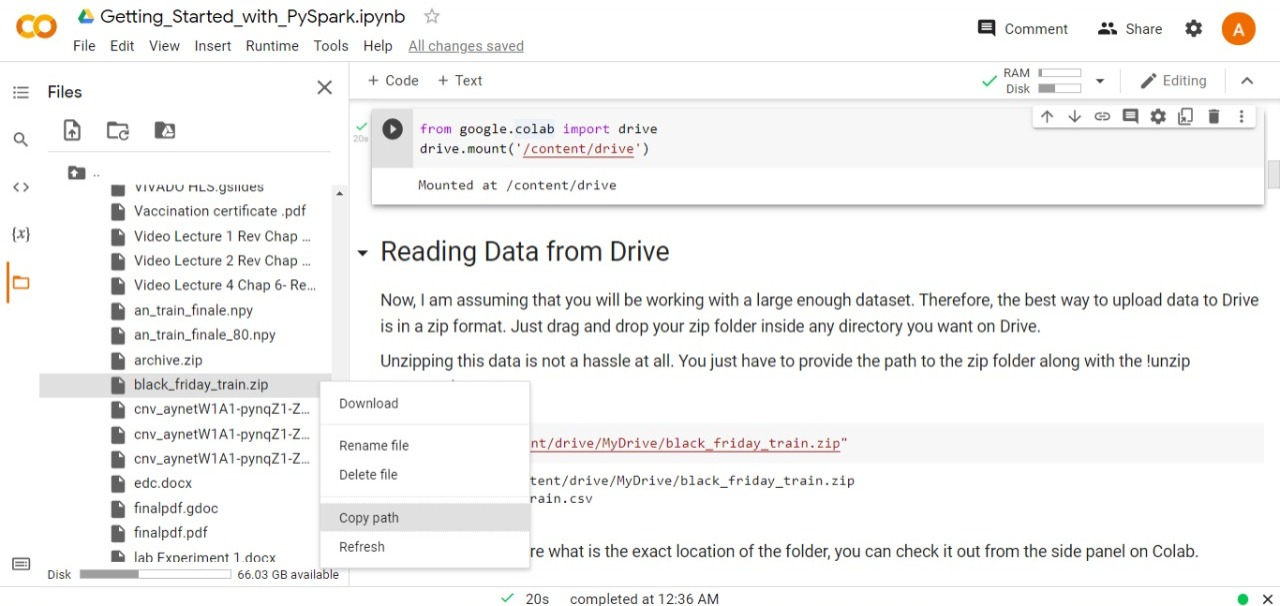

Right, let’s set up Spark

#Setting up PySpark in Colab

Spark is written in the Scala programming language and requires the Java Virtual Machine (JVM) to run. Therefore, our first task is to download Java.

In [ ]:
#!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!java -version

openjdk version "11.0.11" 2021-04-20
OpenJDK Runtime Environment (build 11.0.11+9-Ubuntu-0ubuntu2.18.04)
OpenJDK 64-Bit Server VM (build 11.0.11+9-Ubuntu-0ubuntu2.18.04, mixed mode, sharing)


Next, we will install Apache Spark 3.2.0 with Hadoop 3.2 from [Here](https://spark.apache.org/downloads.html).

In [ ]:
!wget -q http://apache.osuosl.org/spark/spark-3.2.0/spark-3.2.0-bin-hadoop3.2.tgz

Now, we just need to unzip that folder.

In [ ]:
!tar xf spark-3.2.0-bin-hadoop3.2.tgz

Note – At the time of writing this article, 3.0.1 was the latest version of Apache Spark. But Spark is developing quite rapidly. So, if there is a newer version of Spark when you are executing this code, then you just need to replace 3.0.1, wherever you see it, with the latest version. In this case, we are replacing it with 3.2.0


There is one last thing that we need to install and that is the [findspark](https://https://pypi.org/project/findspark/) library. It will locate Spark on the system and import it as a regular library.

In [ ]:
!pip install -q findspark

Now that we have installed all the necessary dependencies in Colab, it is time to set the environment path. This will enable us to run Pyspark in the Colab environment.

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-11-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.2.0-bin-hadoop3.2"

Time for the real test!

We need to locate Spark in the system. For that, we import findspark and use the findspark.init() method.

In [ ]:
import findspark
findspark.init()

Bonus – If you want to know the location where Spark is installed, use findspark.find()

In [ ]:
findspark.find()

'/content/spark-3.2.0-bin-hadoop3.2'

Now, we can import [SparkSession](https://https://spark.apache.org/docs/2.1.0/api/python/pyspark.sql.html?highlight=sparksession#pyspark.sql.SparkSession) from [pyspark.sql](https://https://spark.apache.org/docs/2.1.0/api/python/pyspark.sql.html?highlight=sparksession#pyspark-sql-module) and create a SparkSession, which is the entry point to Spark.

You can give a name to the session using appName() and add some configurations with config() if you wish.

In [ ]:
from pyspark.sql import SparkSession

spark = SparkSession.builder\
        .master("local")\
        .appName("Colab")\
        .config('spark.ui.port', '4050')\
        .getOrCreate()

Finally, print the SparkSession variable.

In [ ]:
spark

If everything goes well, you should be able to view the above output.

If you want to view the Spark UI, you would have to include a few more lines of code to create a public URL for the UI page.

In [ ]:
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip ngrok-stable-linux-amd64.zip
get_ipython().system_raw('./ngrok http 4050 &')
!curl -s http://localhost:4040/api/tunnels

--2021-12-22 05:29:54--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 52.202.168.65, 54.237.133.81, 54.161.241.46, ...
Connecting to bin.equinox.io (bin.equinox.io)|52.202.168.65|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13832437 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]  13.19M  72.9MB/s    in 0.2s    

2021-12-22 05:29:55 (72.9 MB/s) - ‘ngrok-stable-linux-amd64.zip’ saved [13832437/13832437]

Archive:  ngrok-stable-linux-amd64.zip
  inflating: ngrok                   
{"tunnels":[{"name":"command_line","uri":"/api/tunnels/command_line","public_url":"https://d753-34-86-19-234.ngrok.io","proto":"https","config":{"addr":"http://localhost:4050","inspect":true},"metrics":{"conns":{"count":0,"gauge":0,"rate1":0,"rate5":0,"rate15":0,"p50":0,"p90":0,"p95":0,"p99":0},"http":{"count":0,"rate1":0,"rate5":0,"rate15":0,"

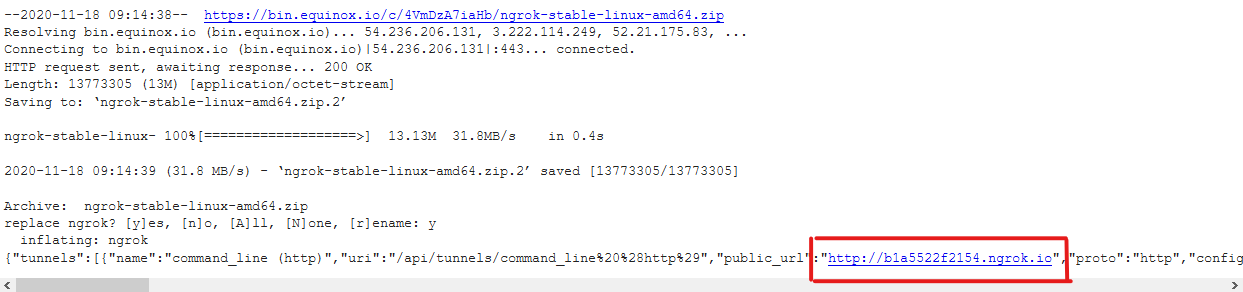

Now you should be able to view the jobs and their stages at the link created.

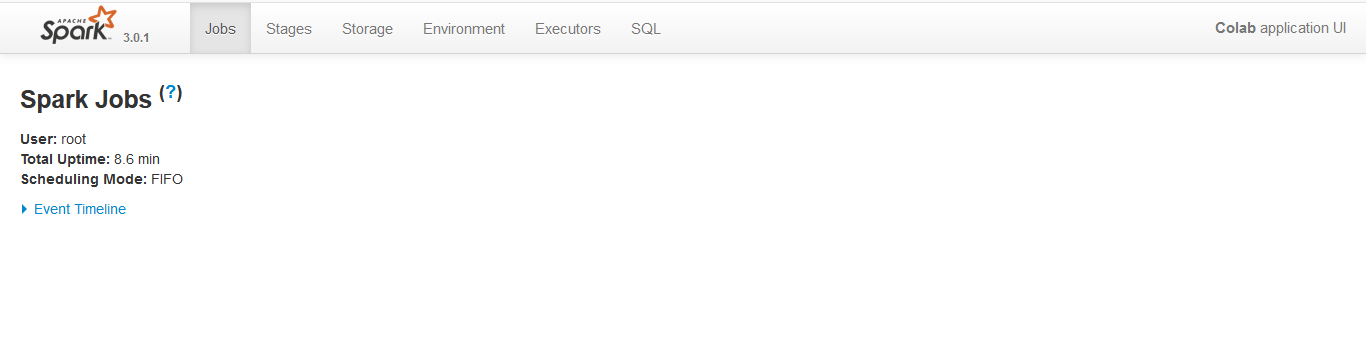

Great! Now let’s get started with **PySpark!**

#Loading data into PySpark

First thing first, we need to load the dataset. We will use the read.csv module. The inferSchema parameter provided will enable Spark to automatically determine the data type for each column but it has to go over the data once. If you don’t want that to happen, then you can instead provide the schema explicitly in the schema parameter.

In [ ]:
df = spark.read.csv("train.csv", header=True, inferSchema=True)

This will create a Spark dataframe.

#Understanding the Data
We have the [Black Friday dataset](https://https://datahack.analyticsvidhya.com/contest/black-friday/#ProblemStatement?utm_source=blog&utm_medium=working-with-pyspark-on-google-colab-for-data-scientists) here from the DataHack Platform. There are purchase summaries of various customers of a retail company from the past month. We are provided with customer demographics, purchase details, and total purchase amount. The goal is to predict the purchase amount per customer against various products.

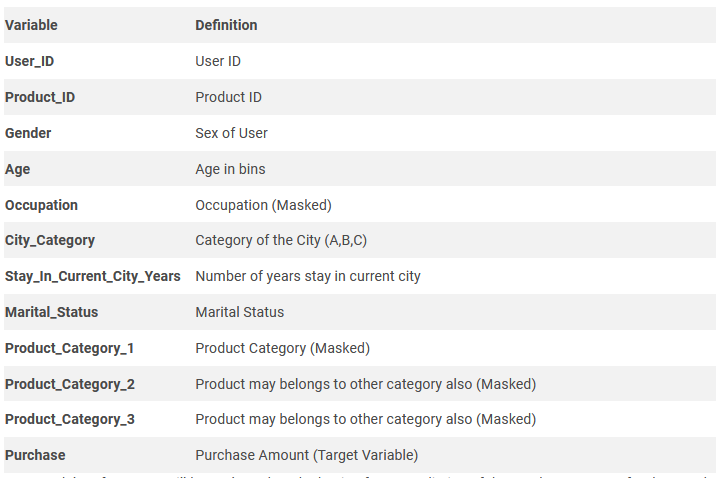

#Data Exploration with PySpark DF
It is now time to use the PySpark dataframe functions to explore our data. And along the way, we will keep comparing it with the Pandas dataframes.

#Show column details
The first step in an exploratory data analysis is to check out the schema of the dataframe. This will give you a bird’s-eye view of the columns in the dataframe along with their data types.

In [ ]:
df.printSchema()

root
 |-- User_ID: integer (nullable = true)
 |-- Product_ID: string (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Age: string (nullable = true)
 |-- Occupation: integer (nullable = true)
 |-- City_Category: string (nullable = true)
 |-- Stay_In_Current_City_Years: string (nullable = true)
 |-- Marital_Status: integer (nullable = true)
 |-- Product_Category_1: integer (nullable = true)
 |-- Product_Category_2: integer (nullable = true)
 |-- Product_Category_3: integer (nullable = true)
 |-- Purchase: integer (nullable = true)



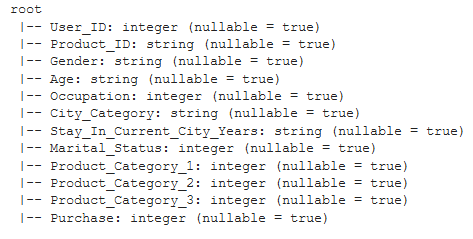

#Display Rows
Now you would obviously want to have a view of the actual data as well.

Just like in Pandas Dataframe you have the df.head() function, here you have the show() function. You can provide the number of rows you want to print within the parenthesis.

In [ ]:
df.show(5)

+-------+----------+------+----+----------+-------------+--------------------------+--------------+------------------+------------------+------------------+--------+
|User_ID|Product_ID|Gender| Age|Occupation|City_Category|Stay_In_Current_City_Years|Marital_Status|Product_Category_1|Product_Category_2|Product_Category_3|Purchase|
+-------+----------+------+----+----------+-------------+--------------------------+--------------+------------------+------------------+------------------+--------+
|1000001| P00069042|     F|0-17|        10|            A|                         2|             0|                 3|              null|              null|    8370|
|1000001| P00248942|     F|0-17|        10|            A|                         2|             0|                 1|                 6|                14|   15200|
|1000001| P00087842|     F|0-17|        10|            A|                         2|             0|                12|              null|              null|    1422|
|100

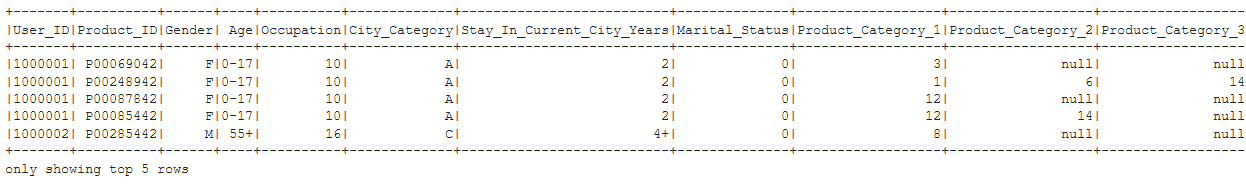

#Number of rows in DF
If you want to know the total number of rows in the dataframe, which you would, just use the count() function.

In [ ]:
df.count()

550068

In [ ]:
550068

#Display specific columns
Sometimes you might want to view some specific columns from the dataframe. For those purposes, you can leverage the capabilities of Spark’s SQL.

Using the [select()](https://https://spark.apache.org/docs/2.1.0/api/python/pyspark.sql.html?highlight=sparksession#pyspark.sql.DataFrame.select) function you can mention any columns you want to view.

In [ ]:
df.select("User_ID","Gender","Age","Occupation").show(5)

+-------+------+----+----------+
|User_ID|Gender| Age|Occupation|
+-------+------+----+----------+
|1000001|     F|0-17|        10|
|1000001|     F|0-17|        10|
|1000001|     F|0-17|        10|
|1000001|     F|0-17|        10|
|1000002|     M| 55+|        16|
+-------+------+----+----------+
only showing top 5 rows



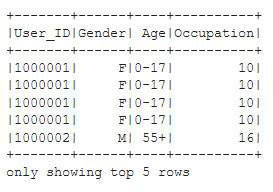

#Describing the columns
Often when we are working with numeric features, we want to have a look at the statistics regarding the dataframe. The describe() function is best suited for such purposes.

It is pretty similar to Panda’s describe function but the statistical values are far less and the string columns are described as well.

In [ ]:
df.describe().show()

+-------+------------------+----------+------+------+------------------+-------------+--------------------------+-------------------+------------------+------------------+------------------+-----------------+
|summary|           User_ID|Product_ID|Gender|   Age|        Occupation|City_Category|Stay_In_Current_City_Years|     Marital_Status|Product_Category_1|Product_Category_2|Product_Category_3|         Purchase|
+-------+------------------+----------+------+------+------------------+-------------+--------------------------+-------------------+------------------+------------------+------------------+-----------------+
|  count|            550068|    550068|550068|550068|            550068|       550068|                    550068|             550068|            550068|            376430|            166821|           550068|
|   mean|1003028.8424013031|      null|  null|  null| 8.076706879876669|         null|         1.468494139793958|0.40965298835780306| 5.404270017525106| 9.842329251

#Working with PySpark on Google Colab for Data Scientists!

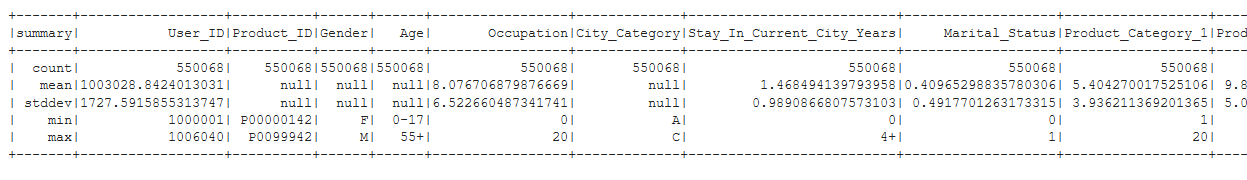

#Distinct values for Categorical columns
The distinct() will come in handy when you want to determine the unique values in the categorical columns in the dataframe.

In [ ]:
df.select("City_Category").distinct().show()

+-------------+
|City_Category|
+-------------+
|            B|
|            C|
|            A|
+-------------+



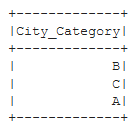

#Aggregate with Groupby
We can use the [groupBy](https://https://spark.apache.org/docs/2.1.0/api/python/pyspark.sql.html?highlight=sparksession#pyspark.sql.DataFrame.groupBy) function to group the dataframe column values and then apply an aggregate function on them to derive some useful insight.

Here, we can group the various city categories in the dataframe and determine the total Purchase per City category. For this, we have to use the  [sum](https://https://spark.apache.org/docs/2.1.0/api/python/pyspark.sql.html?highlight=sparksession#pyspark.sql.functions.sum) aggregate function [from the Spark SQL functions module](https://https://spark.apache.org/docs/2.1.0/api/python/pyspark.sql.html?highlight=sparksession#module-pyspark.sql.functions) .

In [ ]:
from pyspark.sql import functions as F
df.groupBy("City_Category").agg(F.sum("Purchase")).show()

+-------------+-------------+
|City_Category|sum(Purchase)|
+-------------+-------------+
|            B|   2115533605|
|            C|   1663807476|
|            A|   1316471661|
+-------------+-------------+



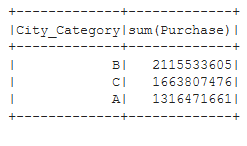

#Counting and Removing Null values
Now we all know that real-world data is not oblivious to missing values. Therefore, it is prudent to always check for missing values and remove them if present

In [ ]:
df.select([F.count(F.when(F.isnull(c), c)).alias(c) for c in df.columns]).show()

+-------+----------+------+---+----------+-------------+--------------------------+--------------+------------------+------------------+------------------+--------+
|User_ID|Product_ID|Gender|Age|Occupation|City_Category|Stay_In_Current_City_Years|Marital_Status|Product_Category_1|Product_Category_2|Product_Category_3|Purchase|
+-------+----------+------+---+----------+-------------+--------------------------+--------------+------------------+------------------+------------------+--------+
|      0|         0|     0|  0|         0|            0|                         0|             0|                 0|            173638|            383247|       0|
+-------+----------+------+---+----------+-------------+--------------------------+--------------+------------------+------------------+------------------+--------+



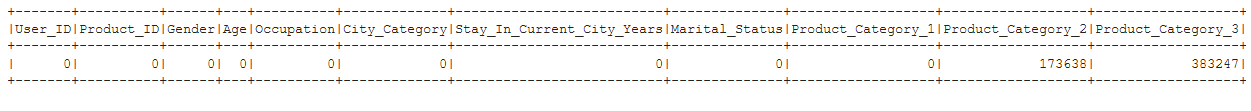

We have a few columns with null values. So it’s best to replace them with some values. According to our dataset, a null value in the Product Category column could mean that the user didn’t buy the product. Therefore, it is best to replace the null value with 0.

We will use the  [fillna()](https://https://spark.apache.org/docs/2.1.0/api/python/pyspark.sql.html?highlight=sparksession#pyspark.sql.DataFrame.fillna)    function to replace the null values. Since Spark dataframes are immutable, we need to store the result in a new dataframe

In [ ]:
df = df.fillna({'Product_Category_2':0, 'Product_Category_3':0})

We can check the null values again to verify the change.

In [ ]:
df.select([F.count(F.when(F.isnull(c), c)).alias(c) for c in df.columns]).show()

+-------+----------+------+---+----------+-------------+--------------------------+--------------+------------------+------------------+------------------+--------+
|User_ID|Product_ID|Gender|Age|Occupation|City_Category|Stay_In_Current_City_Years|Marital_Status|Product_Category_1|Product_Category_2|Product_Category_3|Purchase|
+-------+----------+------+---+----------+-------------+--------------------------+--------------+------------------+------------------+------------------+--------+
|      0|         0|     0|  0|         0|            0|                         0|             0|                 0|                 0|                 0|       0|
+-------+----------+------+---+----------+-------------+--------------------------+--------------+------------------+------------------+------------------+--------+



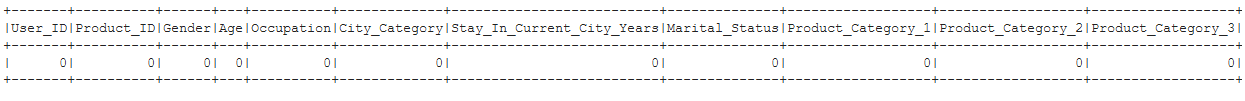

Perfect! There are no more null values in the dataframe.

#Save to file
Finally, after doing all the analysis if you want to save your results into a new CSV file, you can do that using the write.csv() function.

In [ ]:
df.write.csv("/content/drive/My Drive/preprocessed_data")

But there is a catch here. There won’t be just a single CSV saved but multiple depending on the number of partitions of the dataframe. So if there are 2 partitions, then there will be two CSV files saved for each partition.

In [ ]:
df.rdd.getNumPartitions()

1

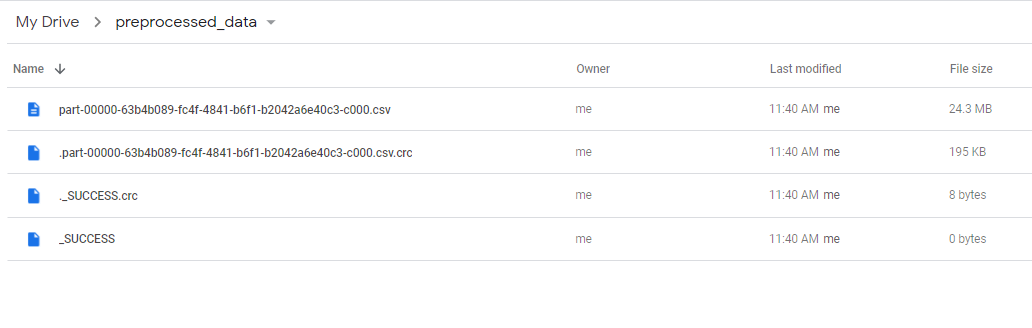

In [ ]:
# Spark df to Pandas df
df_pd = df.toPandas()

# Store result
df_pd.to_csv("/content/drive/My Drive/pandas_preprocessed_data.csv")

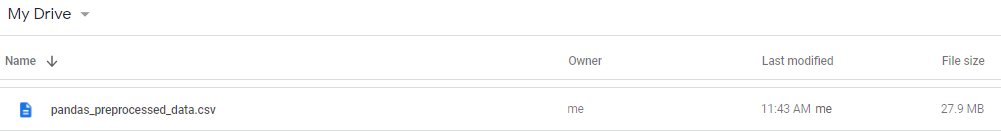

If you are looking to go the extra mile and build a machine learning model using PySpark, then I highly recommend going over [this article!](https://https://www.analyticsvidhya.com/blog/2019/11/build-machine-learning-pipelines-pyspark/?utm_source=blog&utm_medium=working-with-pyspark-on-google-colab-for-data-scientists)

#Conclusions
In this session, we learned to spin off Spark Environment in Google Colab and get hands on experience of playing with Spark Python API called pyspark. This is just a start, you can practice with more examples to sharpen your skills.

 
